In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import pandas as pd

data = pd.read_csv('pageblock.csv')
data = data.sort_values(by='class')
data = data.reset_index(drop=True)

X = data.iloc[0:60, [1,9]].values
X=(X-X.mean())/X.std()
Y = data.iloc[0:60, 10].values
Y = np.where(Y == 'graphic', -1, 1)

data.head()

,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,web_trans,class
0,163,161,26243,0.988,0.523,0.897,8.40,13725,23547,1634,graphic
1,174,471,81954,2.707,0.339,0.433,15.84,27820,35499,1756,graphic
2,72,96,6912,1.333,0.488,0.582,15.69,3374,4025,215,graphic
3,128,347,44416,2.711,0.399,0.567,13.07,17721,25163,1356,graphic
4,186,469,87234,2.522,0.378,0.529,22.29,33017,46133,1481,graphic


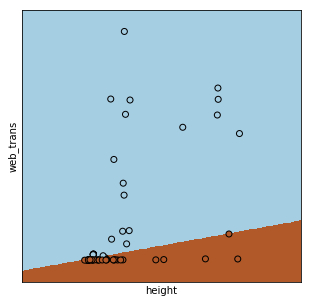

In [36]:
h = .01  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('height')
plt.ylabel('web_trans')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [45]:
X = data.iloc[0:60, [4,5]].values
X=(X-X.mean())/X.std()

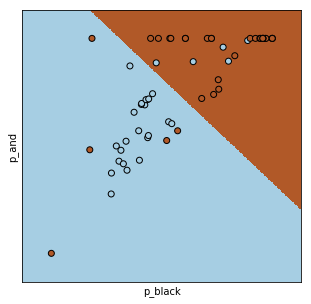

In [46]:
h = .01  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e6)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('p_black')
plt.ylabel('p_and')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()